
# **Linear Regression for a housing dataset**
### Importing the necessary packages

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [ ]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


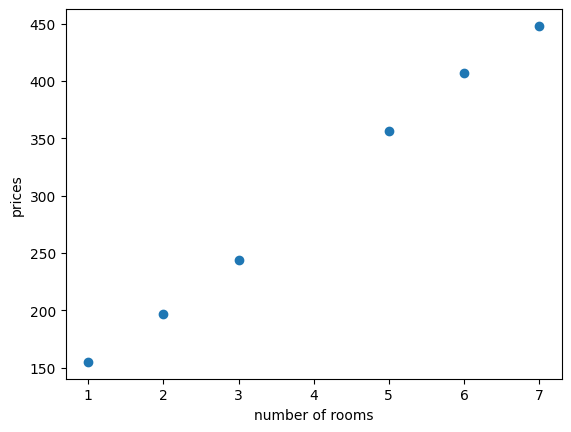

In [ ]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [ ]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_number1= random.random()*0.1
    small_number2= random.random()*0.1
    predicted_price= base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms>0:
      price_per_room+= small_number1
      base_price+= small_number2
    if price > predicted_price and num_rooms<0:
      price_per_room-= small_number1
      base_price+= small_number2
    if price < predicted_price and num_rooms>0:
      price_per_room-= small_number1
      base_price-= small_number2
    if price < predicted_price and num_rooms<0:
      price_per_room+= small_number1
      base_price-= small_number2

    return price_per_room, base_price

In [ ]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price= base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price - predicted_price)
    base_price += learning_rate*(price - predicted_price)
    return price_per_room, base_price

In [ ]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price= base_price + price_per_room*num_rooms
    if price > predicted_price:
      price_per_room += learning_rate*num_rooms
      base_price += learning_rate
    else:
      price_per_room -= learning_rate*num_rooms
      base_price -= learning_rate
    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

Price per room: 40.22442185152521
Base price: 10.757954402940118


(40.22442185152521, 10.757954402940118)

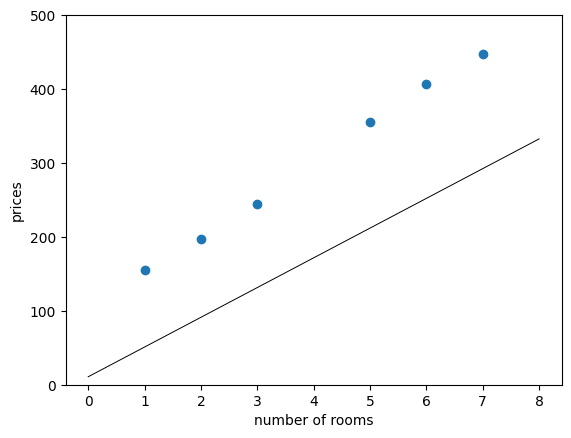

In [ ]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    # using the selected datasample use absolute_trick fn to update price_per_room and base_price
    for epoch in range(epochs):
      i = random.randint(0,len(features)-1)
      price = labels[i]
      num_rooms = features[i]
      price_per_room, base_price = absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate)

    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

Price per room: 51.04430678220095
Base price: 91.59448307644864


(51.04430678220095, 91.59448307644864)

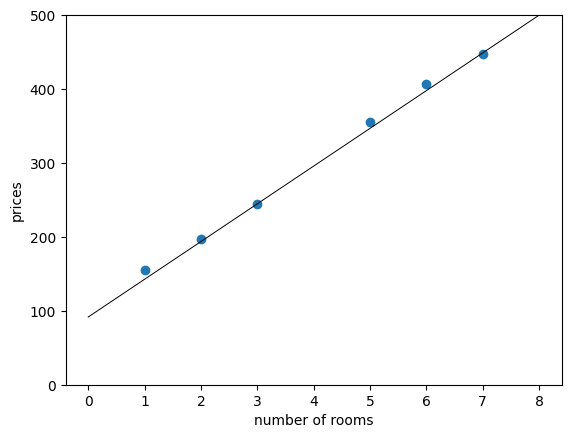

In [ ]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    # using the selected datasample use square_trick fn to update price_per_room and base_price
    for epoch in range(epochs):
      i = random.randint(0,len(features)-1)
      price = labels[i]
      num_rooms = features[i]
      price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate)

    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

### Root mean squared error function

> Add blockquote



In [ ]:
# The root mean square error function
def rmse(labels, predictions):
    n = len (labels)
    diff = np.subtract(labels, predictions)
    error = np.sqrt(1.0/n* (np.dot(diff,diff)))

    return error

### Plotting the error function

Price per room: 50.674635969827705
Base price: 99.8711944536109


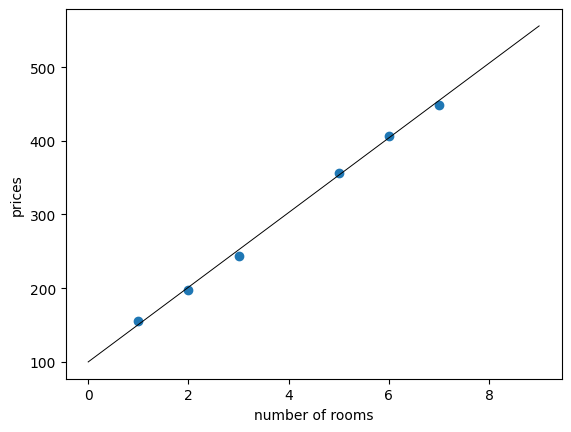

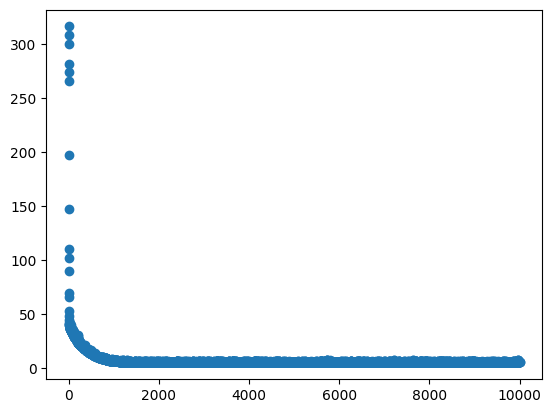

(50.674635969827705, 99.8711944536109)

In [ ]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 2000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Linear regression using sklearn

1.   List item
2.   List item





In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(features.reshape(-1, 1) ,labels)
reg.score(features.reshape(-1, 1) ,labels)*100

0.9979437166148433

In [ ]:
reg.coef_


array([50.39285714])

In [ ]:
reg.intercept_

99.59523809523819

In [ ]:
reg.predict([[4]])

array([301.16666667])

### Normal Equation



The normal equation provides a closed-form solution for linear regression. To implement it, you first need to concatenate a column of ones to the features matrix to account for the bias term.

In [ ]:
def Normal_Equation(features, labels):
    # Adding a column of ones to the features matrix
    X = np.concatenate((np.ones((len(features), 1)), features), axis=1)
    # Computing weights using the normal equation
    W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(labels)
    return W

W = Normal_Equation(features,labels)